<h1>Importando os Dados</h1>

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

OldDataFrame = pd.read_csv('../dados originais/kc_house_data.csv', encoding='UTF-8', sep=",")
DataFrame = OldDataFrame.query('price <= 1000000')
DataFrame['date'] = pd.to_datetime(DataFrame['date'],infer_datetime_format=True)
# about all numeric values (price included)
pd.options.display.float_format = '{:.2f}'.format
DataFrame.head()

C:\Users\nethe\AppData\Local\Temp/ipykernel_13688/1561362918.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['date'] = pd.to_datetime(DataFrame['date'],infer_datetime_format=True)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


<h3>A empresa, House Rocket, deseja obter infromações e o direcionamento de mercado de casas na cidade de King County, USA, para isto ela levantou as seguintes questões: </h3>
<h3> 
    <ol>
    <li>Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?</li>  <br>   
    <li>Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?</li>   <br>  
    <li> A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?</li>       
    </ol>
</h3>

<h6>Informações</h6>

sqft_basement = tamanho do porão

sqft_above = tamanho segundo andar

yr_built = ano de construção

yr_renovated = ano da reforma

# Observando casas reformadas para calcular sua valorização

In [164]:
DataFrame.loc[:,:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


# Diferente do boxplot visto na versão 2, aqui vemos um boxplot que mostra que os outliers em geral foram removidos, ainda temos um grande espaço amostral, porém não temos mais pontos distorcendo nossas análises

Text(0, 0.5, 'Preço em 10 Bilhões')

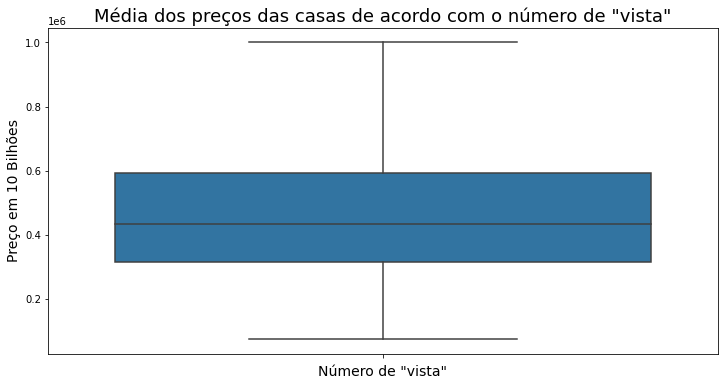

In [165]:
ax = sns.boxplot(y = DataFrame.price)

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

Text(0, 0.5, 'Preço em 10 Bilhões')

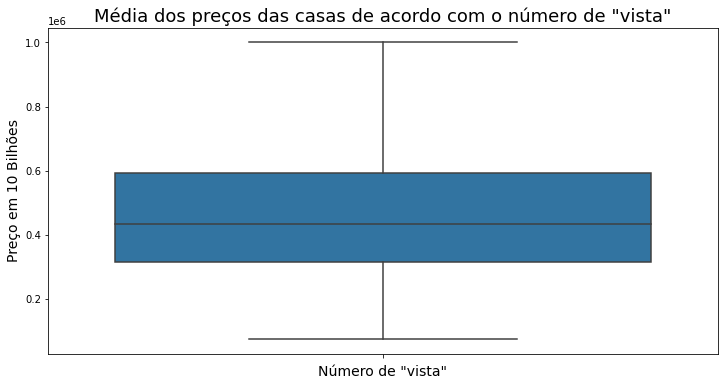

In [166]:
ax = sns.boxplot(y = DataFrame.query('price < 1000000').price)

ax.figure.set_size_inches(12, 6)
ax.set_title('Média dos preços das casas de acordo com o número de "vista"', fontsize=18)
ax.set_xlabel('Número de "vista"', fontsize=14)
ax.set_ylabel('Preço em 10 Bilhões', fontsize=14)

<h1>Dado os boxplots, é notada a presença de diversos outliers que distorcem as informações. Sendo assim, o projeto será refatorado dividindo as bases em duas bases de dados, Casas e Casas de Luxo.</h1>

In [167]:
DataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [168]:
DataFrame['date'] = DataFrame['date'].apply(lambda x: x.toordinal())

C:\Users\nethe\AppData\Local\Temp/ipykernel_13688/318981849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame['date'] = DataFrame['date'].apply(lambda x: x.toordinal())


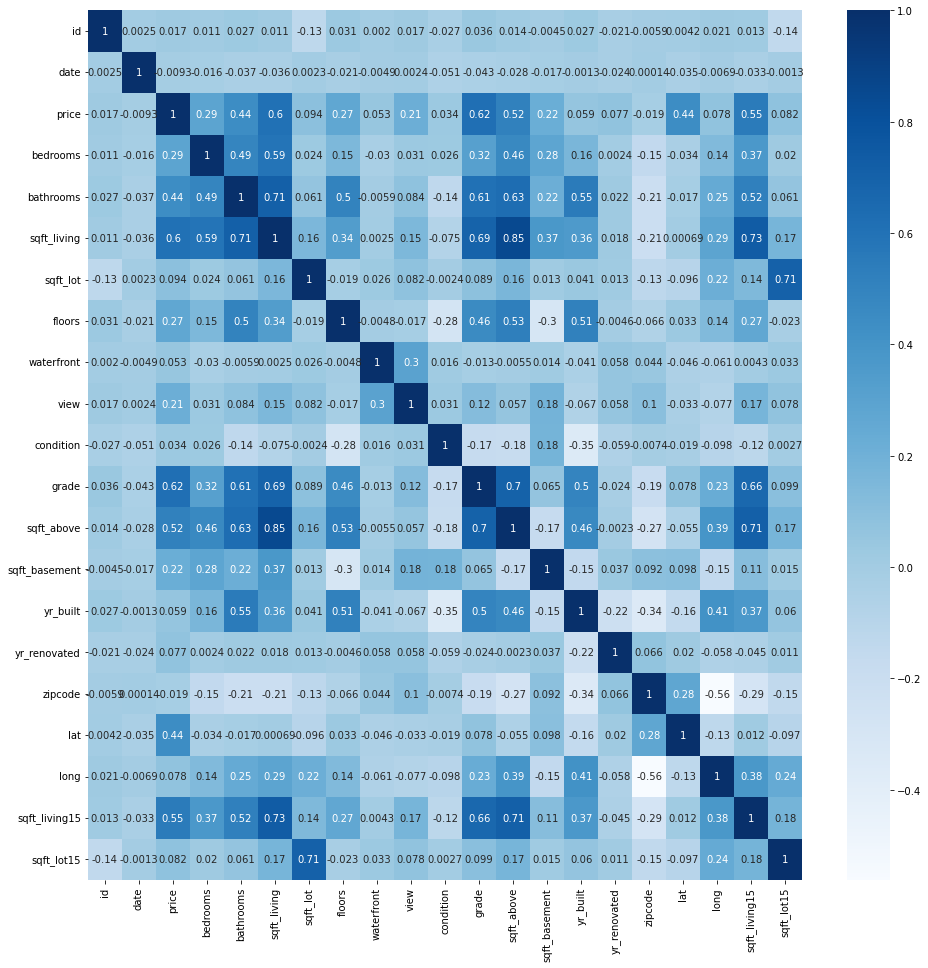

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

corrMatrix = DataFrame.corr(method='pearson')
plt.figure(figsize=(16, 16))
sns.heatmap(corrMatrix, cmap="Blues", annot=True)
plt.show()

In [170]:
vet_corr = corrMatrix.unstack()
maior_corr = vet_corr.where((vet_corr >= 0.7) & (vet_corr < 1)).dropna().sort_values(kind="quicksort", ascending=False)
maior_corr

sqft_living    sqft_above      0.85
sqft_above     sqft_living     0.85
sqft_living    sqft_living15   0.73
sqft_living15  sqft_living     0.73
sqft_above     sqft_living15   0.71
sqft_living15  sqft_above      0.71
bathrooms      sqft_living     0.71
sqft_living    bathrooms       0.71
sqft_lot       sqft_lot15      0.71
sqft_lot15     sqft_lot        0.71
grade          sqft_above      0.70
sqft_above     grade           0.70
dtype: float64

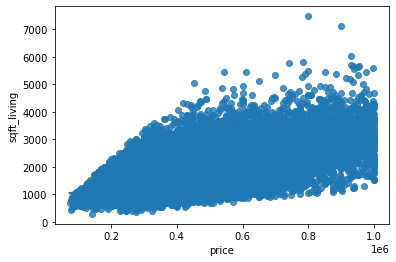

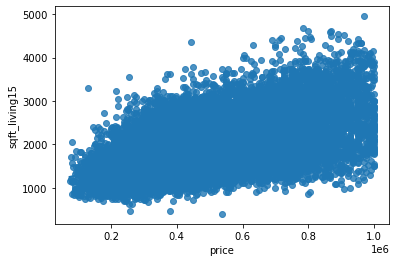

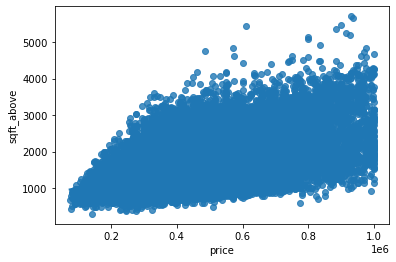

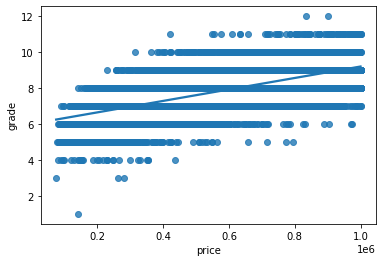

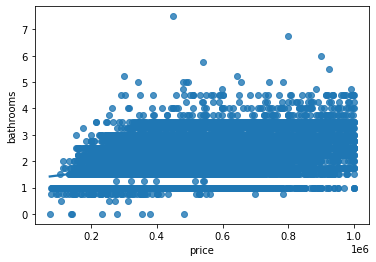

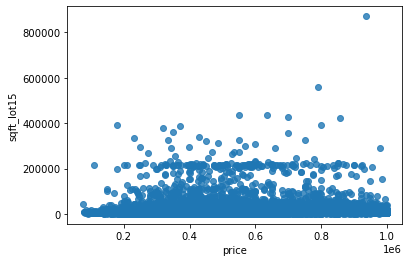

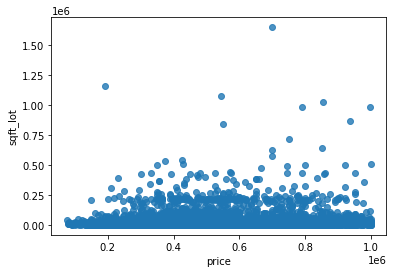

In [171]:
cols_names = ["sqft_living", "sqft_living15", "sqft_above", "grade", "bathrooms", "sqft_lot15", "sqft_lot"]
for name in cols_names:
    sns.regplot(x=DataFrame["price"], y=DataFrame[name])
    plt.show()


In [172]:
from sklearn.model_selection import train_test_split

X = DataFrame.drop('price', axis=1)
y = DataFrame['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [173]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

scoreTrain = model.score(X_train, y_train)
scoreTest = model.score(X_test, y_test) 

print(f"Train accuracy {round(scoreTrain * 100,0)} %")
print(f"Test accuracy {round(scoreTest* 100,0)} %")


Train accuracy 69.0 %
Test accuracy 70.0 %


In [175]:
def roundlista(lista):
    i = 0
    for item in lista:
        lista[i] = round(item)
        i+=1

# "sqft_living"

In [176]:
DataFrame.sort_values(by = "sqft_living", ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4024,9175600025,735513,800000.00,7,6.75,7480,41664,2.00,0,2,...,11,5080,2400,1953,0,98166,47.46,-122.37,2810,33190
21050,2424059170,735648,900000.00,5,6.00,7120,40806,2.00,0,4,...,12,5480,1640,2007,0,98006,47.55,-122.11,3440,36859
577,1526069135,735578,930000.00,4,4.00,6050,84942,2.50,0,2,...,9,4150,1900,2009,0,98077,47.75,-122.03,2700,199504
18414,5469650040,735673,784500.00,4,5.00,5820,13906,2.00,0,0,...,11,3750,2070,1993,0,98042,47.38,-122.16,2980,13000
1921,5152960710,735367,740000.00,5,5.00,5774,31675,1.00,0,2,...,11,4490,1284,1984,0,98003,47.35,-122.32,3260,13200
1807,2025770560,735540,930000.00,4,4.25,5710,24663,2.00,0,0,...,11,5710,0,2007,0,98092,47.31,-122.16,4060,23847
1055,5416300240,735631,935000.00,4,4.50,5670,84267,2.00,0,2,...,11,5670,0,2008,0,98010,47.32,-122.04,4100,83729
8195,2526069095,735389,955000.00,4,4.25,5660,193593,2.00,0,0,...,10,4100,1560,2001,0,98019,47.71,-121.98,3620,207141
20296,521049227,735568,950000.00,4,4.00,5635,9695,2.00,0,3,...,10,4360,1275,2011,0,98003,47.34,-122.33,3726,9765
16888,1424130050,735583,995000.00,5,4.00,5610,22529,2.00,0,0,...,11,4090,1520,1996,0,98072,47.72,-122.09,3860,24751


In [177]:
data = DataFrame.sort_values(by = "sqft_living", ascending = False).head(20).query("price == price.min()")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10980,5729000070,735626,545000.00,4,2.00,5461,22880,1.00,0,0,...,9,3265,2196,1964,0,98032,47.36,-122.29,1940,10995


In [178]:
lista = model.predict(data.drop("price", axis = 1)).tolist()
roundlista(lista)
lista

[718244]

In [179]:
data['price_prediction'] = lista
data['MaiorCorrelação'] = 'sqft_living'
Export = data
Export

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_prediction,MaiorCorrelação
10980,5729000070,735626,545000.00,4,2.00,5461,22880,1.00,0,0,...,2196,1964,0,98032,47.36,-122.29,1940,10995,718244,sqft_living


# "sqft_living15"

In [180]:
DataFrame.sort_values(by = "sqft_living15", ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12517,5700004525,735408,970000.00,3,2.25,3060,9950,1.50,0,2,...,9,1810,1250,1930,0,98144,47.58,-122.28,4950,10655
11253,2025770310,735395,785000.00,3,3.50,4500,21870,2.00,0,0,...,10,4500,0,2004,0,98092,47.30,-122.16,4670,23058
12210,3299610240,735717,870000.00,4,2.50,3240,7621,2.00,0,2,...,9,3240,0,2003,0,98075,47.56,-122.03,4610,7150
3271,2386000300,735569,800000.00,4,2.50,4600,67369,2.00,0,0,...,10,4600,0,1990,0,98053,47.64,-121.99,4600,67369
19670,745530240,735593,865950.00,5,3.50,4890,12039,2.00,0,0,...,9,3590,1300,2014,0,98011,47.73,-122.21,4590,10079
20762,8562710520,735358,890000.00,5,3.50,4490,6000,2.00,0,0,...,10,3200,1290,2006,0,98027,47.54,-122.07,4530,6000
19879,8562710640,735640,909500.00,4,4.00,4420,5940,2.00,0,0,...,10,3410,1010,2006,0,98027,47.54,-122.07,4510,5797
21024,745530180,735674,870000.00,5,3.50,4495,10079,2.00,0,0,...,9,3580,915,2013,0,98011,47.73,-122.21,4495,10079
20607,7853280370,735551,805000.00,5,4.50,4600,7810,2.00,0,0,...,9,3200,1400,2006,0,98065,47.54,-121.86,4480,6324
20892,7299810040,735694,790000.00,4,3.00,5370,69848,2.00,0,0,...,10,3500,1870,2005,0,98042,47.32,-122.05,4443,94403


In [181]:
data = DataFrame.sort_values(by = "sqft_living15", ascending = False).head(20).query("price == price.min()")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19731,2867300030,735446,442000.00,4,4.00,4168,8485,2.00,0,0,...,10,3222,946,2007,0,98023,47.30,-122.39,4362,8100


In [182]:
lista = model.predict(data.drop("price", axis = 1)).tolist()
roundlista(lista)
lista

[751247]

In [183]:
data['price_prediction'] = lista
data['MaiorCorrelação'] = 'sqft_living15'
Export = pd.concat([Export, data])
Export

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_prediction,MaiorCorrelação
10980,5729000070,735626,545000.00,4,2.00,5461,22880,1.00,0,0,...,2196,1964,0,98032,47.36,-122.29,1940,10995,718244,sqft_living
19731,2867300030,735446,442000.00,4,4.00,4168,8485,2.00,0,0,...,946,2007,0,98023,47.30,-122.39,4362,8100,751247,sqft_living15


# "sqft_above"

In [184]:
DataFrame.sort_values(by = "sqft_above", ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1807,2025770560,735540,930000.00,4,4.25,5710,24663,2.00,0,0,...,11,5710,0,2007,0,98092,47.31,-122.16,4060,23847
1055,5416300240,735631,935000.00,4,4.50,5670,84267,2.00,0,2,...,11,5670,0,2008,0,98010,47.32,-122.04,4100,83729
21050,2424059170,735648,900000.00,5,6.00,7120,40806,2.00,0,4,...,12,5480,1640,2007,0,98006,47.55,-122.11,3440,36859
1622,9485950310,735509,610000.00,4,3.25,5450,37058,1.50,0,0,...,9,5450,0,1984,0,98042,47.35,-122.09,2800,35716
3721,5451100490,735613,884900.00,7,4.75,5370,10800,1.50,0,0,...,8,5370,0,1967,0,98040,47.54,-122.22,2310,10910
7545,1323059143,735711,915000.00,4,4.50,5250,48352,2.00,0,0,...,10,5250,0,1998,0,98059,47.49,-122.11,2500,48352
13907,7851990120,735415,925000.00,5,5.50,5190,12637,2.00,0,2,...,11,5190,0,2001,0,98065,47.54,-121.87,3840,12637
7280,922059169,735568,800000.00,6,4.25,5480,189050,2.00,0,0,...,10,5140,340,1991,0,98031,47.41,-122.17,2470,10429
4024,9175600025,735513,800000.00,7,6.75,7480,41664,2.00,0,2,...,11,5080,2400,1953,0,98166,47.46,-122.37,2810,33190
1294,2025760160,735417,835000.00,4,4.25,4930,25714,2.00,0,0,...,12,4930,0,2005,0,98092,47.31,-122.15,3620,23035


In [185]:
data = DataFrame.sort_values(by = "sqft_above", ascending = False).head(20).query("price == price.min()")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2411,3020079078,735533,487000.00,6,3.25,4750,248600,2.00,0,0,...,8,4750,0,1947,0,98022,47.19,-121.97,2230,311610


In [186]:
lista = model.predict(data.drop("price", axis = 1)).tolist()
roundlista(lista)
lista

[603487]

In [187]:
data['price_prediction'] = lista
data['MaiorCorrelação'] = 'sqft_above'
Export = pd.concat([Export, data])
Export

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_prediction,MaiorCorrelação
10980,5729000070,735626,545000.00,4,2.00,5461,22880,1.00,0,0,...,2196,1964,0,98032,47.36,-122.29,1940,10995,718244,sqft_living
19731,2867300030,735446,442000.00,4,4.00,4168,8485,2.00,0,0,...,946,2007,0,98023,47.30,-122.39,4362,8100,751247,sqft_living15
2411,3020079078,735533,487000.00,6,3.25,4750,248600,2.00,0,0,...,0,1947,0,98022,47.19,-121.97,2230,311610,603487,sqft_above


# "grade"

In [188]:
DataFrame.sort_values(by = "grade", ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1294,2025760160,735417,835000.00,4,4.25,4930,25714,2.00,0,0,...,12,4930,0,2005,0,98092,47.31,-122.15,3620,23035
21050,2424059170,735648,900000.00,5,6.00,7120,40806,2.00,0,4,...,12,5480,1640,2007,0,98006,47.55,-122.11,3440,36859
6608,2944000050,735710,995000.00,4,3.25,3530,20012,2.00,0,0,...,11,3530,0,1986,0,98052,47.72,-122.13,3850,20707
15254,3293400020,735614,910000.00,4,3.50,3570,27699,2.00,0,0,...,11,3570,0,1990,0,98052,47.72,-122.10,3800,35880
21034,8121100155,735654,810000.00,4,3.50,2700,2868,2.00,0,0,...,11,1920,780,2006,0,98118,47.57,-122.29,1430,3858
6234,2195700050,735372,810000.00,4,2.50,3480,59242,2.00,0,0,...,11,3480,0,1988,0,98072,47.74,-122.10,2930,39400
14669,4139430910,735527,935000.00,4,3.25,4110,15488,2.00,0,2,...,11,4110,0,1995,0,98006,47.55,-122.12,4190,14973
9714,225079036,735605,937500.00,4,4.00,5545,871200,2.00,0,0,...,11,3605,1940,2003,0,98014,47.68,-121.88,3420,871200
5214,3303980680,735657,997000.00,4,3.50,3430,13609,2.00,0,0,...,11,3430,0,2001,0,98059,47.52,-122.15,3880,11614
2407,3888100128,735442,968933.00,4,3.50,4120,7304,2.00,0,0,...,11,3070,1050,2006,0,98033,47.68,-122.17,2470,9600


In [189]:
data = DataFrame.sort_values(by = "grade", ascending = False).head(20).query("price == price.min()")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21034,8121100155,735654,810000.00,4,3.50,2700,2868,2.00,0,0,...,11,1920,780,2006,0,98118,47.57,-122.29,1430,3858
6234,2195700050,735372,810000.00,4,2.50,3480,59242,2.00,0,0,...,11,3480,0,1988,0,98072,47.74,-122.10,2930,39400


In [190]:
lista = model.predict(data.drop("price", axis = 1)).tolist()
roundlista(lista)
lista

[714639, 929430]

In [191]:
data['price_prediction'] = lista
data['MaiorCorrelação'] = 'grade'
Export = pd.concat([Export, data])
Export

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_prediction,MaiorCorrelação
10980,5729000070,735626,545000.00,4,2.00,5461,22880,1.00,0,0,...,2196,1964,0,98032,47.36,-122.29,1940,10995,718244,sqft_living
19731,2867300030,735446,442000.00,4,4.00,4168,8485,2.00,0,0,...,946,2007,0,98023,47.30,-122.39,4362,8100,751247,sqft_living15
2411,3020079078,735533,487000.00,6,3.25,4750,248600,2.00,0,0,...,0,1947,0,98022,47.19,-121.97,2230,311610,603487,sqft_above
21034,8121100155,735654,810000.00,4,3.50,2700,2868,2.00,0,0,...,780,2006,0,98118,47.57,-122.29,1430,3858,714639,grade
6234,2195700050,735372,810000.00,4,2.50,3480,59242,2.00,0,0,...,0,1988,0,98072,47.74,-122.10,2930,39400,929430,grade


# "bathrooms"

In [192]:
DataFrame.sort_values(by = "bathrooms", ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8546,424049043,735456,450000.00,9,7.50,4050,6504,2.00,0,0,...,7,4050,0,1996,0,98144,47.59,-122.30,1448,3866
4024,9175600025,735513,800000.00,7,6.75,7480,41664,2.00,0,2,...,11,5080,2400,1953,0,98166,47.46,-122.37,2810,33190
21050,2424059170,735648,900000.00,5,6.00,7120,40806,2.00,0,4,...,12,5480,1640,2007,0,98006,47.55,-122.11,3440,36859
15751,6744700427,735360,540000.00,7,5.75,3700,7647,2.00,0,1,...,8,3700,0,1948,1984,98155,47.74,-122.29,2510,7479
13907,7851990120,735415,925000.00,5,5.50,5190,12637,2.00,0,2,...,11,5190,0,2001,0,98065,47.54,-121.87,3840,12637
4598,9297300740,735555,643500.00,6,5.25,3600,3960,2.00,0,0,...,7,2400,1200,1971,0,98126,47.57,-122.37,1450,4600
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,7,2860,0,1978,0,98002,47.30,-122.22,1390,5956
2345,3185600055,735395,495000.00,6,5.00,3440,4500,2.00,0,0,...,8,3280,160,2007,0,98055,47.49,-122.22,1400,5500
19656,2922059212,735607,480000.00,6,5.00,3028,18055,2.00,0,0,...,7,3028,0,2005,0,98030,47.37,-122.20,1400,34575
5210,3886901795,735710,655000.00,6,5.00,2850,6600,2.00,0,0,...,7,2850,0,1994,0,98033,47.68,-122.19,1870,9900


In [193]:
data = DataFrame.sort_values(by = "bathrooms", ascending = False).head(20).query("price == price.min()")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,7,2860,0,1978,0,98002,47.30,-122.22,1390,5956


In [194]:
lista = model.predict(data.drop("price", axis = 1)).tolist()
roundlista(lista)
lista

[373924]

In [199]:
data['price_prediction'] = lista
data['MaiorCorrelação'] = 'bathrooms'
Export = pd.concat([Export, data])
Export

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_prediction,MaiorCorrelação
10980,5729000070,735626,545000.00,4,2.00,5461,22880,1.00,0,0,...,2196,1964,0,98032,47.36,-122.29,1940,10995,718244,sqft_living
19731,2867300030,735446,442000.00,4,4.00,4168,8485,2.00,0,0,...,946,2007,0,98023,47.30,-122.39,4362,8100,751247,sqft_living15
2411,3020079078,735533,487000.00,6,3.25,4750,248600,2.00,0,0,...,0,1947,0,98022,47.19,-121.97,2230,311610,603487,sqft_above
21034,8121100155,735654,810000.00,4,3.50,2700,2868,2.00,0,0,...,780,2006,0,98118,47.57,-122.29,1430,3858,714639,grade
6234,2195700050,735372,810000.00,4,2.50,3480,59242,2.00,0,0,...,0,1988,0,98072,47.74,-122.10,2930,39400,929430,grade
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms


# "sqft_lot"

In [200]:
data = DataFrame.sort_values(by = "sqft_lot", ascending = False).head(20)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1719,1020069017,735684,700000.00,4,1.00,1300,1651359,1.00,0,3,...,6,1300,0,1920,0,98022,47.23,-122.02,2560,425581
17319,3326079016,735722,190000.00,2,1.00,710,1164794,1.00,0,0,...,5,710,0,1915,0,98014,47.69,-121.91,1680,16730
7647,2623069031,735374,542500.00,5,3.25,3010,1074218,1.50,0,0,...,8,2010,1000,1931,0,98027,47.46,-122.00,2450,68825
7769,2323089009,735617,855000.00,4,3.50,4030,1024068,2.00,0,0,...,10,4030,0,2006,0,98045,47.46,-121.74,1830,11700
3949,722069232,735481,998000.00,4,3.25,3770,982998,2.00,0,0,...,10,3770,0,1992,0,98058,47.41,-122.09,2290,37141
4441,3626079040,735444,790000.00,2,3.00,2560,982278,1.00,0,0,...,8,2560,0,2004,0,98014,47.70,-121.86,1620,40946
9714,225079036,735605,937500.00,4,4.00,5545,871200,2.00,0,0,...,11,3605,1940,2003,0,98014,47.68,-121.88,3420,871200
4540,2522029039,735505,550000.00,3,2.00,3650,843309,2.00,0,0,...,7,3650,0,1991,0,98070,47.36,-122.50,1870,273992
13006,619079096,735694,750000.00,3,2.50,2350,715690,1.50,0,0,...,9,2350,0,1979,0,98022,47.16,-121.97,1280,325393
13477,822039004,735397,849900.00,2,2.00,2280,641203,2.00,0,0,...,9,2280,0,1990,0,98070,47.41,-122.45,2030,224334


In [201]:
data = DataFrame.sort_values(by = "sqft_lot", ascending = False).head(20).query("price == price.min()")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17319,3326079016,735722,190000.00,2,1.00,710,1164794,1.00,0,0,...,5,710,0,1915,0,98014,47.69,-121.91,1680,16730


In [202]:
lista = model.predict(data.drop("price", axis = 1)).tolist()
roundlista(lista)
lista

[611605]

In [203]:
data['price_prediction'] = lista
data['MaiorCorrelação'] = 'sqft_lot'
Export = pd.concat([Export, data])
Export

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_prediction,MaiorCorrelação
10980,5729000070,735626,545000.00,4,2.00,5461,22880,1.00,0,0,...,2196,1964,0,98032,47.36,-122.29,1940,10995,718244,sqft_living
19731,2867300030,735446,442000.00,4,4.00,4168,8485,2.00,0,0,...,946,2007,0,98023,47.30,-122.39,4362,8100,751247,sqft_living15
2411,3020079078,735533,487000.00,6,3.25,4750,248600,2.00,0,0,...,0,1947,0,98022,47.19,-121.97,2230,311610,603487,sqft_above
21034,8121100155,735654,810000.00,4,3.50,2700,2868,2.00,0,0,...,780,2006,0,98118,47.57,-122.29,1430,3858,714639,grade
6234,2195700050,735372,810000.00,4,2.50,3480,59242,2.00,0,0,...,0,1988,0,98072,47.74,-122.10,2930,39400,929430,grade
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms


# "sqft_lot15"

In [204]:
data = DataFrame.sort_values(by = "sqft_lot15", ascending = False).head(20)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9714,225079036,735605,937500.00,4,4.00,5545,871200,2.00,0,0,...,11,3605,1940,2003,0,98014,47.68,-121.88,3420,871200
13464,3420069060,735544,790000.00,3,2.50,2640,432036,1.50,0,3,...,10,2640,0,1996,0,98022,47.18,-122.04,1500,560617
8664,3226079059,735525,549950.00,3,1.75,2930,266587,2.00,0,0,...,8,2440,490,1995,0,98014,47.70,-121.95,2700,438213
3801,1550000463,735471,637000.00,4,3.50,3080,118918,2.00,0,0,...,9,3080,0,2008,0,98019,47.77,-121.92,1830,434728
1719,1020069017,735684,700000.00,4,1.00,1300,1651359,1.00,0,3,...,6,1300,0,1920,0,98022,47.23,-122.02,2560,425581
19156,1020069042,735507,858000.00,4,3.50,4370,422967,1.00,0,2,...,10,2580,1790,1978,0,98022,47.23,-122.03,3260,422967
15620,2225079030,735579,180000.00,2,1.00,960,87991,1.50,0,0,...,5,960,0,1946,0,98014,47.63,-121.90,1940,392040
21431,2725079018,735362,800000.00,4,3.25,3540,159430,2.00,0,0,...,9,3540,0,2007,0,98014,47.63,-121.90,1940,392040
17659,620079042,735680,370000.00,2,1.00,2360,105850,1.00,0,2,...,6,1180,1180,1947,0,98022,47.25,-121.97,2640,386812
11183,1422029117,735425,319000.00,3,1.75,1640,53400,1.00,0,0,...,7,1640,0,1966,0,98070,47.39,-122.51,1850,380279


In [205]:
data = DataFrame.sort_values(by = "sqft_lot15", ascending = False).head(20).query("price == price.min()")
data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15620,2225079030,735579,180000.00,2,1.00,960,87991,1.50,0,0,...,5,960,0,1946,0,98014,47.63,-121.90,1940,392040


In [206]:
lista = model.predict(data.drop("price", axis = 1)).tolist()
roundlista(lista)
lista

[258947]

In [207]:
data['price_prediction'] = lista
data['MaiorCorrelação'] = 'sqft_lot15'
Export = pd.concat([Export, data])
Export

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_prediction,MaiorCorrelação
10980,5729000070,735626,545000.00,4,2.00,5461,22880,1.00,0,0,...,2196,1964,0,98032,47.36,-122.29,1940,10995,718244,sqft_living
19731,2867300030,735446,442000.00,4,4.00,4168,8485,2.00,0,0,...,946,2007,0,98023,47.30,-122.39,4362,8100,751247,sqft_living15
2411,3020079078,735533,487000.00,6,3.25,4750,248600,2.00,0,0,...,0,1947,0,98022,47.19,-121.97,2230,311610,603487,sqft_above
21034,8121100155,735654,810000.00,4,3.50,2700,2868,2.00,0,0,...,780,2006,0,98118,47.57,-122.29,1430,3858,714639,grade
6234,2195700050,735372,810000.00,4,2.50,3480,59242,2.00,0,0,...,0,1988,0,98072,47.74,-122.10,2930,39400,929430,grade
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms


In [209]:
Export.rename(columns={"MaiorCorrelação": "MaiorCorrelacao"})

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_prediction,MaiorCorrelacao
10980,5729000070,735626,545000.00,4,2.00,5461,22880,1.00,0,0,...,2196,1964,0,98032,47.36,-122.29,1940,10995,718244,sqft_living
19731,2867300030,735446,442000.00,4,4.00,4168,8485,2.00,0,0,...,946,2007,0,98023,47.30,-122.39,4362,8100,751247,sqft_living15
2411,3020079078,735533,487000.00,6,3.25,4750,248600,2.00,0,0,...,0,1947,0,98022,47.19,-121.97,2230,311610,603487,sqft_above
21034,8121100155,735654,810000.00,4,3.50,2700,2868,2.00,0,0,...,780,2006,0,98118,47.57,-122.29,1430,3858,714639,grade
6234,2195700050,735372,810000.00,4,2.50,3480,59242,2.00,0,0,...,0,1988,0,98072,47.74,-122.10,2930,39400,929430,grade
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms
16803,7116500920,735373,300000.00,6,5.25,2860,5682,2.00,0,0,...,0,1978,0,98002,47.30,-122.22,1390,5956,373924,bathrooms


In [210]:
Export.to_csv('Result.csv',index=False, sep=';')